Available columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Random Forest Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Gradient Boosting Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(

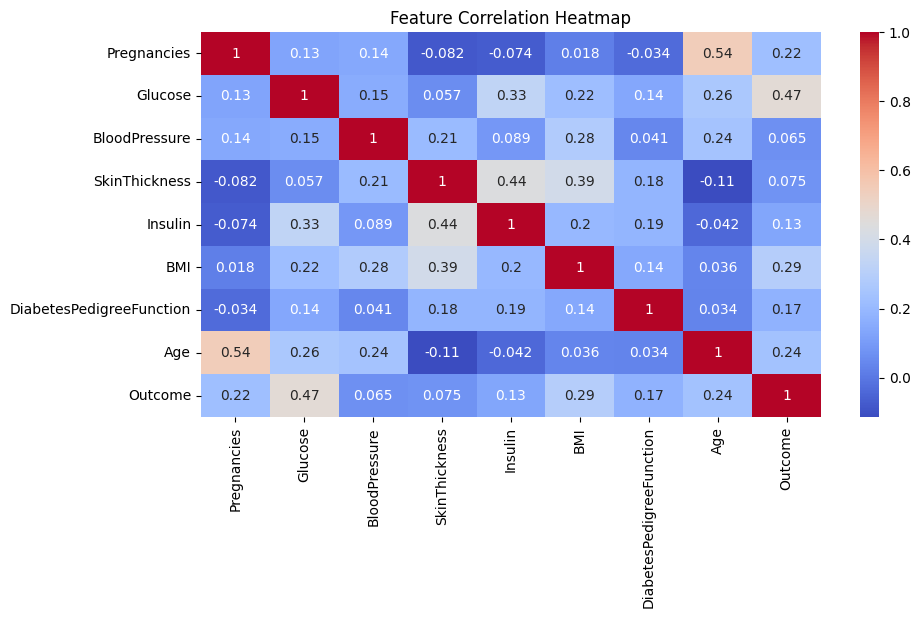

FloatText(value=0.0, description='Pregnancies')

FloatText(value=0.0, description='Glucose')

FloatText(value=0.0, description='BloodPressure')

FloatText(value=0.0, description='SkinThickness')

FloatText(value=0.0, description='Insulin')

FloatText(value=0.0, description='BMI')

FloatText(value=0.0, description='DiabetesPedigreeFunction')

FloatText(value=0.0, description='Age')

Button(description='Predict Diabetes', style=ButtonStyle())

Label(value='')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import ipywidgets as widgets
from IPython.display import display

# Load diabetes dataset
df = pd.read_csv("/content/diabetes_data.csv")

# Print available columns for debugging
print("Available columns:", df.columns.tolist())

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Identify target and feature columns
target_col = "Outcome"
if target_col not in df.columns:
    raise ValueError("Error: The target column does not exist in the dataset.")

y = df[target_col]
X = df.drop(columns=[target_col])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models for numerical data
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier()
}

best_model = None
best_score = 0

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f'{name} Accuracy: {acc}')
    print(classification_report(y_test, y_pred))

    if acc > best_score:
        best_score = acc
        best_model = pipeline

print(f'Best Model: {best_model}')

# Visualization
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Function to predict diabetes based on user input
def predict_diabetes(_):
    input_data = pd.DataFrame([[float(entry.value) for entry in input_widgets]], columns=X.columns)
    prediction = best_model.predict(input_data)
    result.value = "The patient is likely to have diabetes." if prediction[0] == 1 else "The patient is unlikely to have diabetes."

# Create input fields for user input
input_widgets = [widgets.FloatText(description=col, value=0) for col in X.columns]
submit_button = widgets.Button(description="Predict Diabetes")
result = widgets.Label()

submit_button.on_click(predict_diabetes)

# Display the interactive fields
display(*input_widgets, submit_button, result)









